In [86]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# pd.set_option('display.width', 1000)
# pd.set_option('display.max_columns', None)


In [39]:
df = fetch_openml(name = 'credit-g', version= 1)
x = df.data
y = df.target
x.describe().columns
y.describe()
# x.info()
numericke = list(x.describe().columns)
kategorije = list(set(x.columns) - set(numericke))

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numericke),
                                               ('kat', OneHotEncoder(drop='first', handle_unknown='ignore'), kategorije)])

logreg = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LogisticRegression(max_iter=4000, C = 7))  
])
svc = Pipeline([
    ('preprocessing', preprocessor),
    ('model', SVC(C=8))  
])
rf = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])
def namesti(model):
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)    
    print(f"Tačnost modela: {accuracy_score(ytest, pred):.4f}")
    print(confusion_matrix(ytest, pred), ytest.value_counts())
    print(f"\nModel: {model.named_steps['model'].__class__.__name__}")


In [40]:
namesti(logreg)

Tačnost modela: 0.8100
[[ 35  24]
 [ 14 127]] class
good    141
bad      59
Name: count, dtype: int64

Model: LogisticRegression


In [41]:
namesti(rf)

Tačnost modela: 0.7750
[[ 25  34]
 [ 11 130]] class
good    141
bad      59
Name: count, dtype: int64

Model: RandomForestClassifier


In [4]:
y_numeric = y.map({'bad': 0, 'good': 1})
y_numeric

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: class, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y_numeric, test_size=0.2, random_state=42)

In [29]:
def crtaj(model):
    trening = np.linspace(150, len(xtrain), 70).astype(int)
    f1train = []
    for i in trening:
        xs = xtrain.iloc[:i]
        ys = ytrain.iloc[:i]
        model.fit(xs,ys)
        pred = model.predict(xs)
        score = f1_score(ys, pred, average='binary')
        f1train.append(score)
    
    f1test = []
    for i in trening:
        xs = xtrain.iloc[:i]
        ys = ytrain.iloc[:i]
        model.fit(xs,ys)
        pred = model.predict(xtest)
        score = f1_score(ytest, pred, average='binary')
        f1test.append(score)
    plt.figure(figsize=(8, 6))
    plt.plot(trening, f1train, marker='o', label='Trening F1-score')
    plt.plot(trening, f1test, marker='o',label='Test F1-score')
    plt.xlabel("Veličina trening skupa")
    plt.ylabel("F1-score")
    plt.title("F1-score u odnosu na veličinu trening skupa")
    plt.xlim(150, 800)
    plt.ylim(0.7, 1)
    plt.grid(True)
    plt.legend()
    plt.show()

In [76]:
def rfcrtaj(rf):
    trening = np.linspace(150, len(xtrain), 70).astype(int)
    f1train = []
    for i in trening:
        xs = xtrain.iloc[:i]
        ys = ytrain.iloc[:i]
        rf.fit(xs,ys)
        pred = rf.predict(xs)
        pred_bin = [1 if p == 'good' else 0 for p in pred]
        ys_bin = [1 if y == 'good' else 0 for y in ys]
        score = f1_score(ys_bin, pred_bin, average='binary')
        f1train.append(score)
    f1test = []
    for i in trening:
        xs = xtrain.iloc[:i]
        ys = ytrain.iloc[:i]
        rf.fit(xs,ys)
        pred = rf.predict(xtest)
        pred_bin = [1 if p == 'good' else 0 for p in pred]
        ytest_bin = [1 if y == 'good' else 0 for y in ytest]
        score = f1_score(ytest_bin, pred_bin, average='binary')
        f1test.append(score)
    plt.figure(figsize=(8, 6))
    plt.plot(trening, f1train, marker='o', label='Trening F1-score')
    plt.plot(trening, f1test, marker='o',label='Test F1-score')
    plt.xlabel("Veličina trening skupa")
    plt.ylabel("F1-score")
    plt.title("F1-score u odnosu na veličinu trening skupa")
    plt.xlim(150, 800)
    plt.ylim(0.7, 1)
    plt.grid(True)
    plt.legend()
    plt.show()

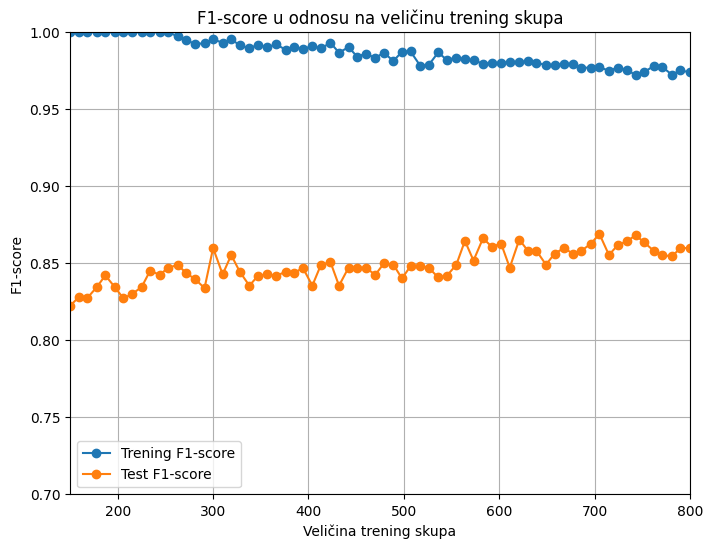

In [77]:
rf = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10))
])
rfcrtaj(rf)

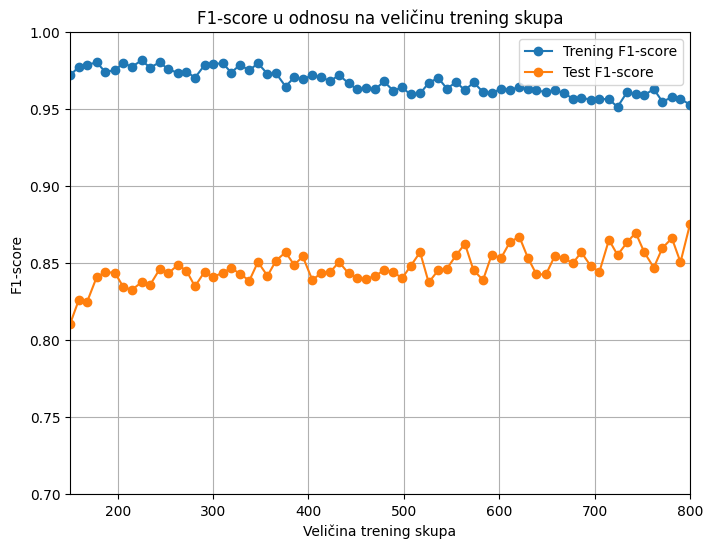

In [78]:
rf = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5))
])
rfcrtaj(rf)

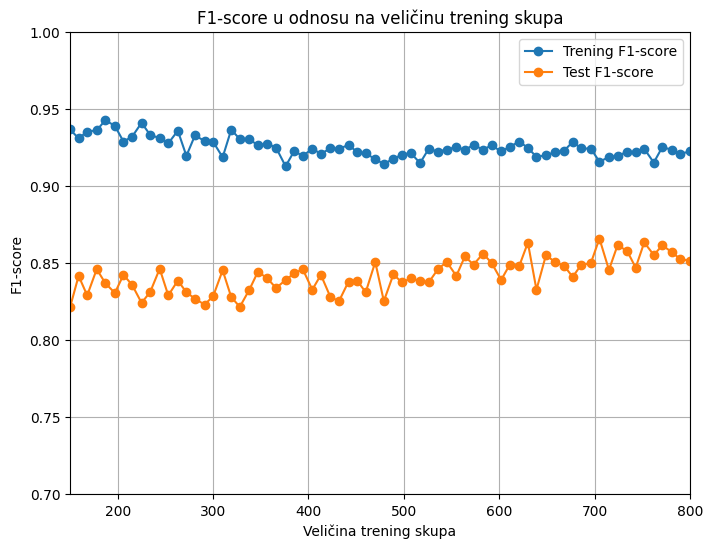

In [81]:
rf = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=3))
])
rfcrtaj(rf)

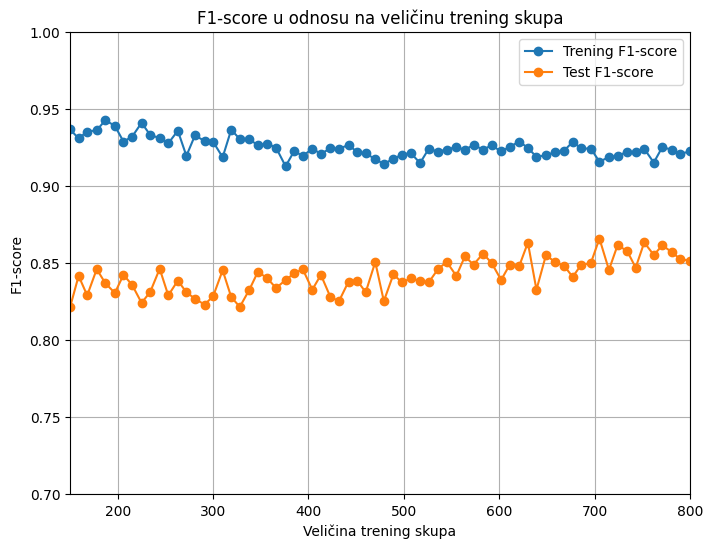

In [82]:
rf = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=3, max_features='sqrt'))
])
rfcrtaj(rf)

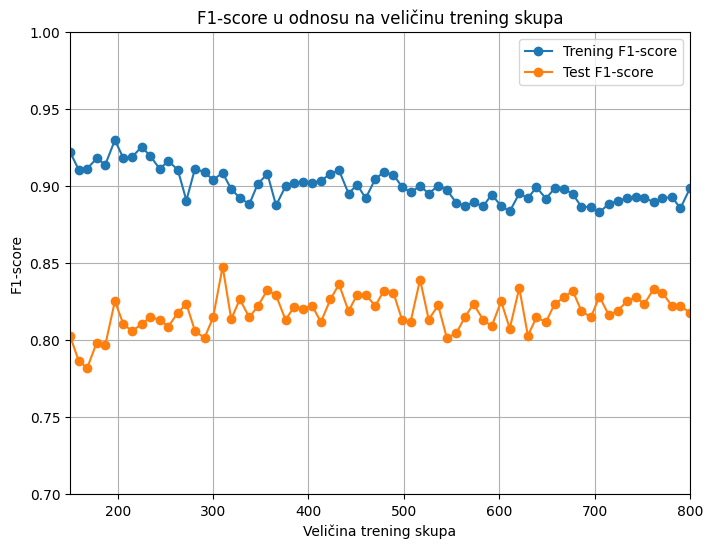

In [92]:
rf = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42,
                                     max_depth=10, min_samples_split=5, min_samples_leaf=5,
                                     max_features='sqrt', class_weight = 'balanced'))
])
rfcrtaj(rf)

In [68]:
f1test = []
for i in trening:
    xs = xtrain.iloc[:i]
    ys = ytrain.iloc[:i]
    rf.fit(xs,ys)
    pred = rf.predict(xtest)
    pred_bin = [1 if p == 'good' else 0 for p in pred]
    ytest_bin = [1 if y == 'good' else 0 for y in ytest]
    score = f1_score(ytest_bin, pred_bin, average='binary')
    f1test.append(score)

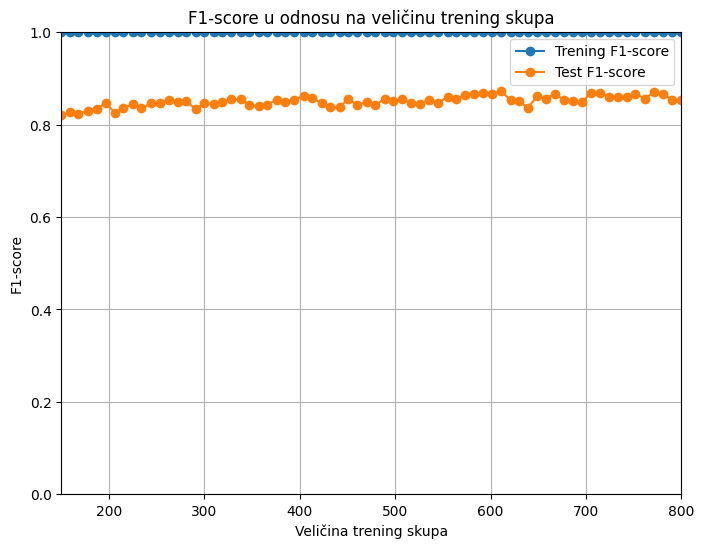

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(trening, f1train, marker='o', label='Trening F1-score')
plt.plot(trening, f1test, marker='o',label='Test F1-score')
plt.xlabel("Veličina trening skupa")
plt.ylabel("F1-score")
plt.title("F1-score u odnosu na veličinu trening skupa")
plt.xlim(150, 800)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

In [30]:
grid = [0.1,1,4,8,10]

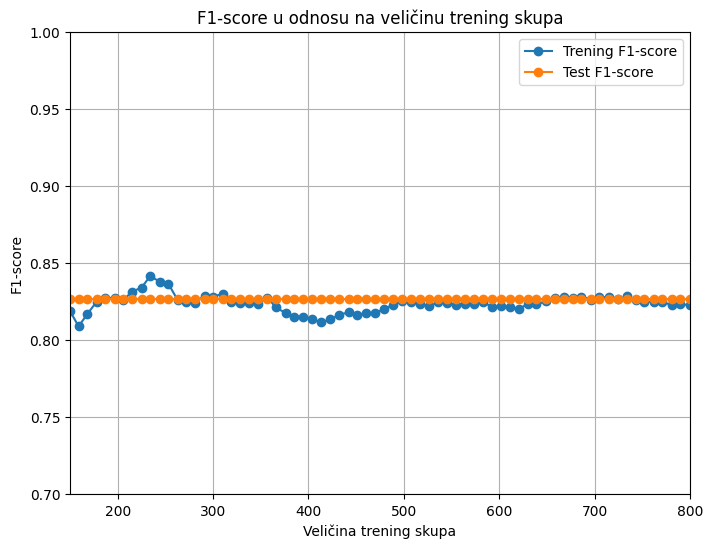

0.1


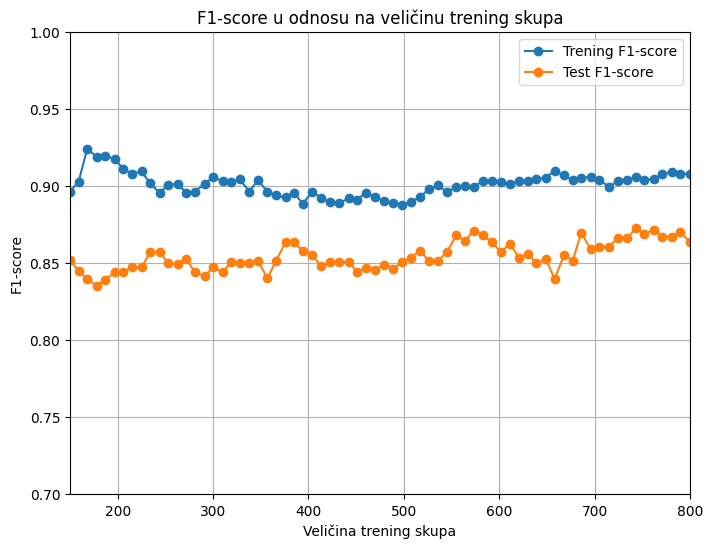

1


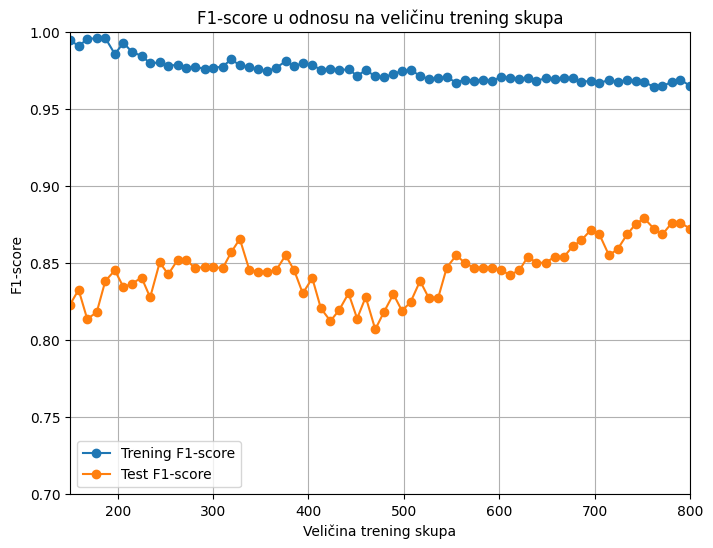

4


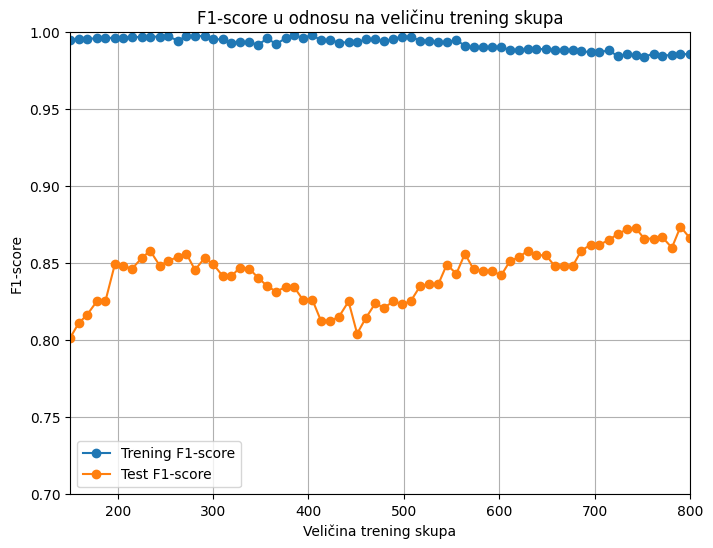

8


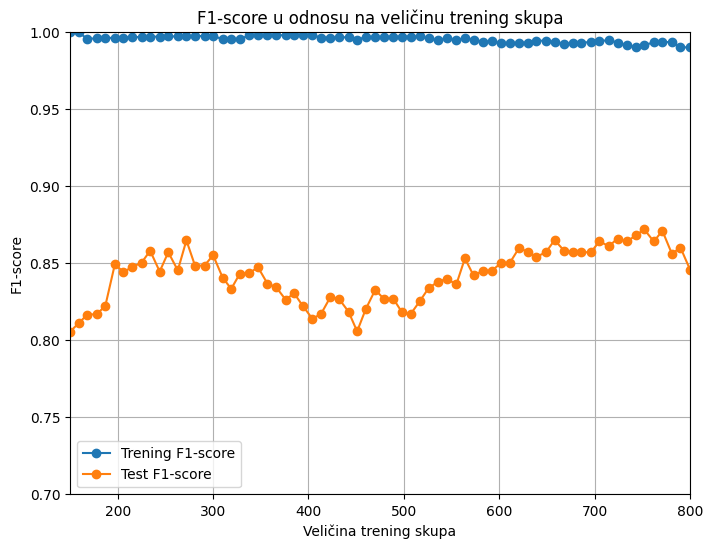

10


In [31]:
for c in grid:
    svc = Pipeline([('preprocessing', preprocessor),
                    ('model', SVC(C = c))])
    crtaj(svc)
    print(c)

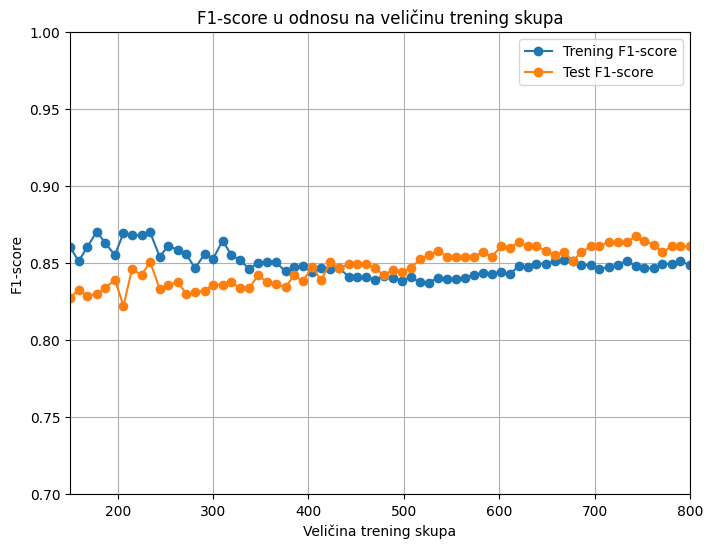

0.1


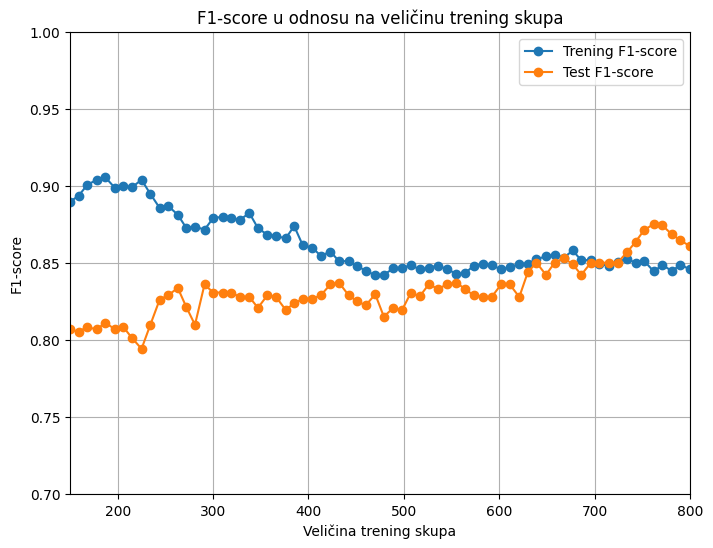

1


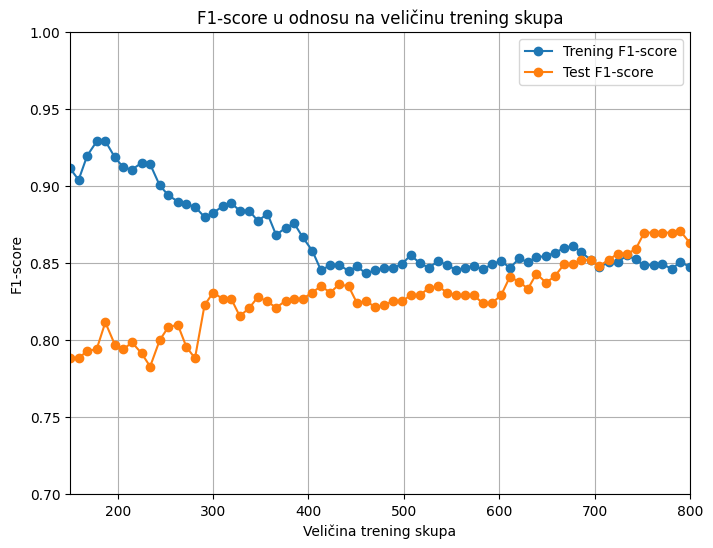

4


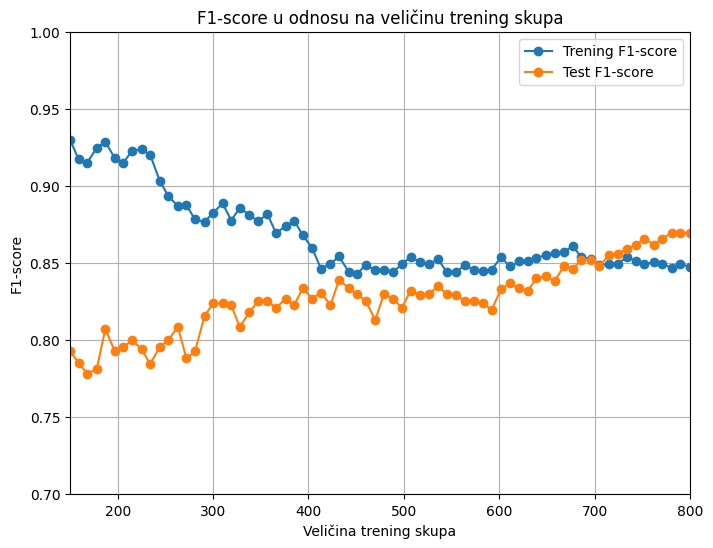

8


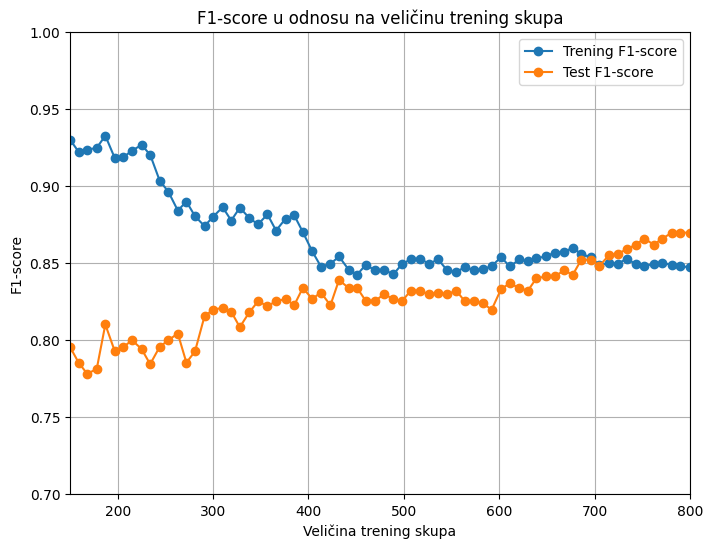

10


In [32]:
for c in grid:
    logit = Pipeline([('preprocessing', preprocessor),
                    ('model', LogisticRegression(C = c))])
    crtaj(logit)
    print(c)

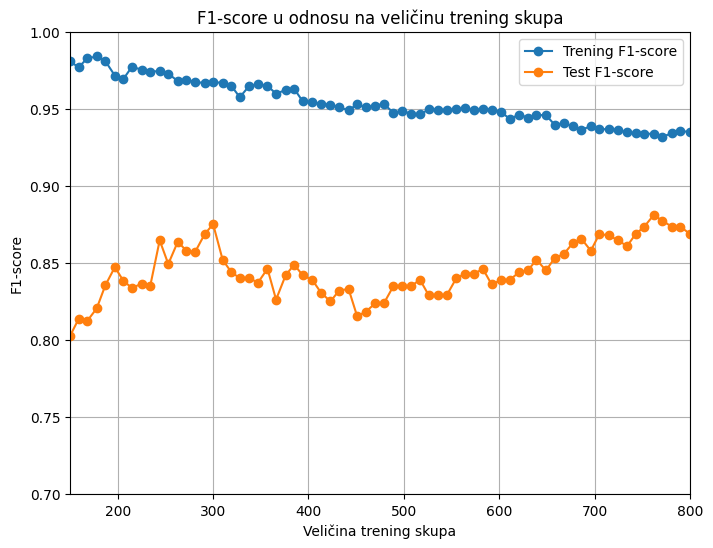

0.1


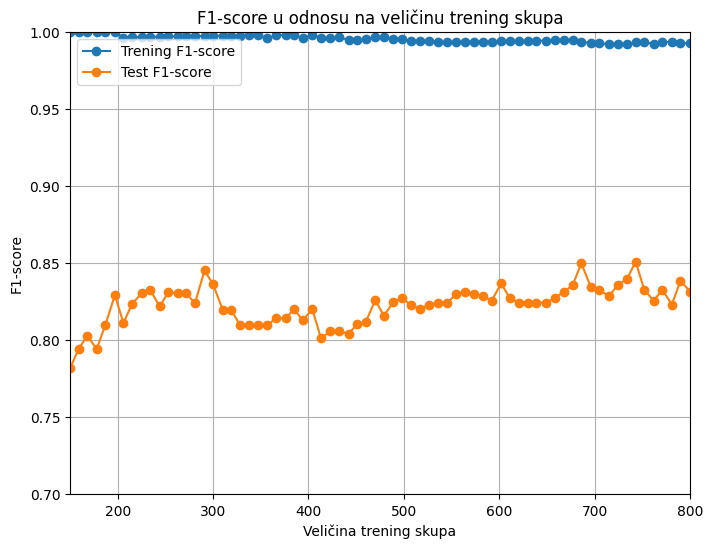

1


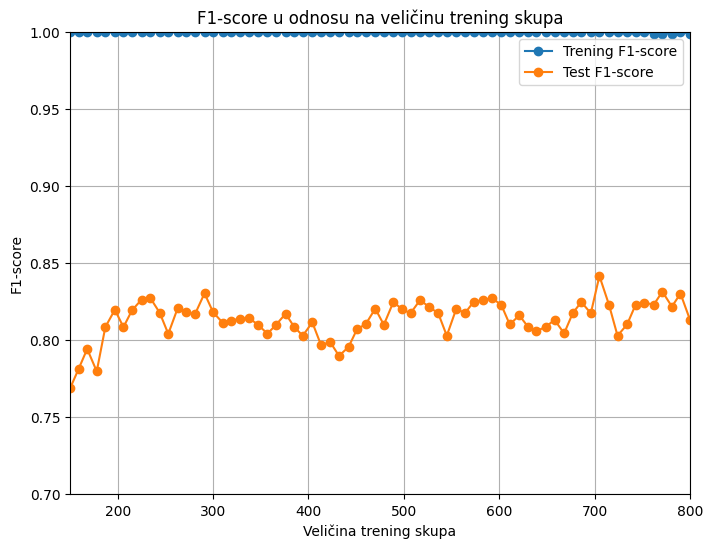

4


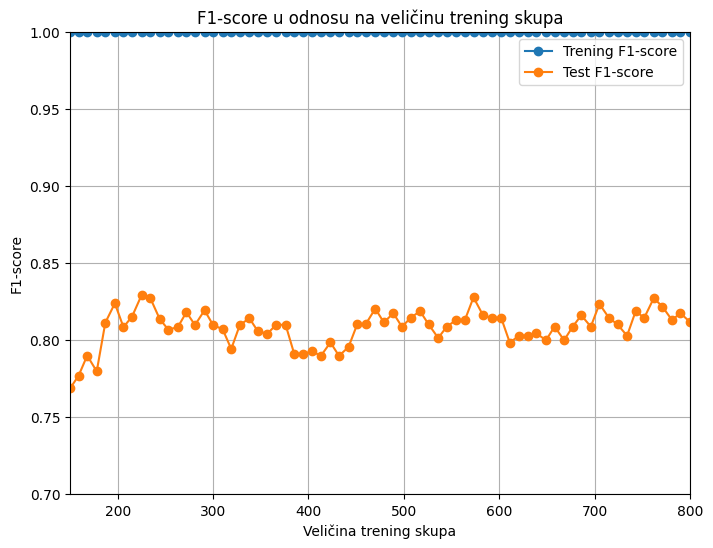

8


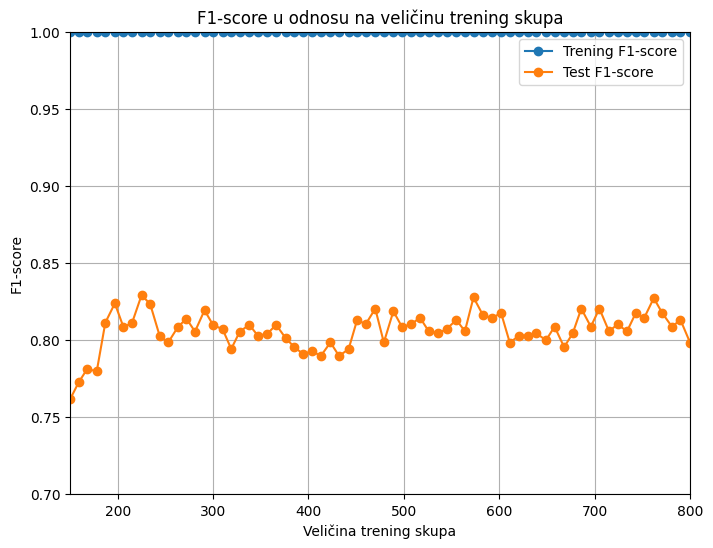

10


In [33]:
for c in grid:
    polyLogit = Pipeline([('preprocessing', preprocessor),
                           ('poly', PolynomialFeatures(degree=2)),
                           ('model', LogisticRegression(C = c))])
    crtaj(polyLogit)
    print(c)

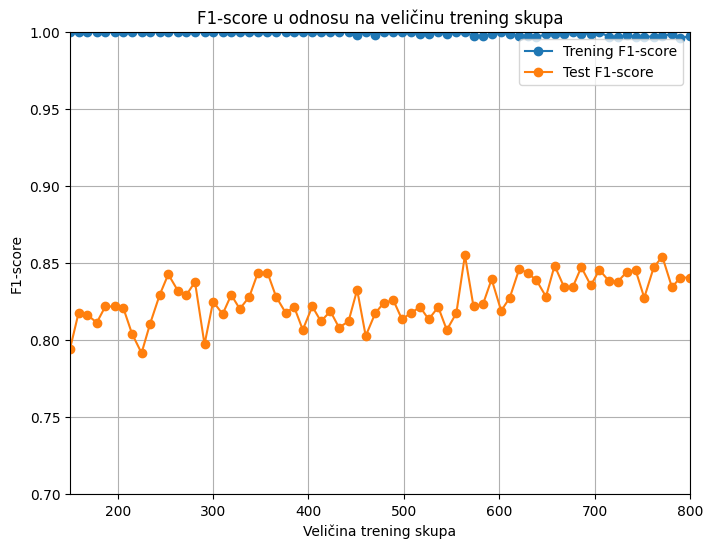

In [89]:
gb = Pipeline([
    ('preprocessing', preprocessor),
    ('model', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
])
rfcrtaj(gb)

In [28]:
logreg = Pipeline([('preprocessing', preprocessor),
                    ('model', LogisticRegression(max_iter=1000, C = 0.1))  ])
crtaj(logreg)

Tačnost modela: 0.7900
[[ 25  34]
 [  8 133]] class
1    141
0     59
Name: count, dtype: int64

Model: SVC


In [12]:
f1testsvc[0],f1testsvc[-1], f1trainsvc[0],f1trainsvc[-1]

(0.8013937282229965,
 0.8661971830985915,
 0.9952153110047847,
 0.9858407079646018)

In [13]:
namesti(svc)

Tačnost modela: 0.8100
[[ 39  20]
 [ 18 123]] class
1    141
0     59
Name: count, dtype: int64

Model: SVC


In [14]:
naziv = preprocessor.get_feature_names_out()

In [15]:
theta = logreg.named_steps['model'].coef_[0]
theta

array([-0.251592  , -0.37249537, -0.35628443, -0.02839038,  0.32734222,
       -0.20030755, -0.07380257,  0.21157252, -0.36519182,  0.26939885,
        0.88542525,  0.06360271, -0.19281357, -0.94085393,  0.288035  ,
       -0.68317167,  0.42857556,  0.26560523, -0.31522839,  1.08309659,
        0.96157664, -0.43414402,  0.61922878,  1.1682655 , -0.02735666,
        0.83929062,  0.09724112, -0.09067763, -0.34920423,  0.24639598,
        0.2065129 , -0.1621744 ,  0.77512063,  0.52673371, -1.30475157,
        0.75268801,  0.21516133,  1.39014617,  0.93774643,  0.53678683,
       -0.12212154, -0.46959065, -0.05103924,  0.51115212,  0.47661491,
        0.00176527,  0.1824133 , -0.24441467])

In [16]:
vaznost = pd.DataFrame({'Feature': naziv, 'Importance': theta}).sort_values(by='Importance', ascending=False)
vaznost

,Feature,Importance
37,kat__credit_history_critical/other existing cr...,1.390146
23,kat__checking_status_no checking,1.168265
19,kat__purpose_retraining,1.083097
20,kat__purpose_used car,0.961577
38,kat__credit_history_delayed previously,0.937746
10,kat__other_parties_guarantor,0.885425
25,kat__job_unemp/unskilled non res,0.839291
32,kat__savings_status_>=1000,0.775121
35,kat__other_payment_plans_none,0.752688
22,kat__checking_status_>=200,0.619229
